### What is the safest neighborhood in San Francisco?

Now let's look at the second question of interest. That is - What is the safest neighborhood in San Francisco? And the least safe?

Again, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [2]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [8]:
resolutionCrimes = df['Resolution'].value_counts().reset_index()
resolutionCrimes.head()

,index,Resolution
0,NONE,107780
1,"ARREST, BOOKED",39416
2,UNFOUNDED,1608
3,JUVENILE BOOKED,1056
4,EXCEPTIONAL CLEARANCE,371


In [9]:
resolutionCrimes.rename(columns={'index': 'Resolution', 'Resolution': 'Number of Crimes'}, inplace=True)
resolutionCrimes.head()

,Resolution,Number of Crimes
0,NONE,107780
1,"ARREST, BOOKED",39416
2,UNFOUNDED,1608
3,JUVENILE BOOKED,1056
4,EXCEPTIONAL CLEARANCE,371


A quick look through data, allows us to create a list of all of the individual methods marked by a user.

In [10]:
# We might also look at the percent

resolutionCrimes['Percentage'] = resolutionCrimes['Number of Crimes']/np.sum(resolutionCrimes['Number of Crimes'])*100
resolutionCrimes.head()

,Resolution,Number of Crimes,Percentage
0,NONE,107780,71.614618
1,"ARREST, BOOKED",39416,26.190033
2,UNFOUNDED,1608,1.068439
3,JUVENILE BOOKED,1056,0.701661
4,EXCEPTIONAL CLEARANCE,371,0.246512


Text(0.5, 1.0, 'Crime distribution by resolution')

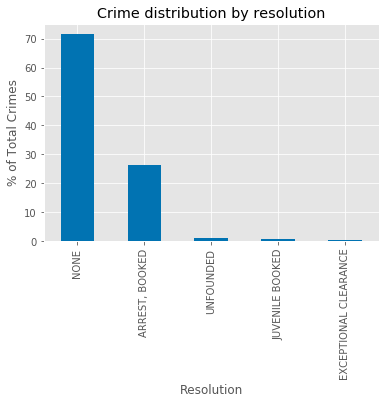

In [19]:
# Show number of crimes per district
# Create bars

crimeResolutionPlot = resolutionCrimes[:5].plot.bar('Resolution', 'Percentage', legend = False)
crimeResolutionPlot.set_ylabel('% of Total Crimes')
crimeResolutionPlot.set_title('Crime distribution by resolution')

In [138]:
df[['DayOfWeek', 'Category', 'PdDistrict']].groupby(['DayOfWeek', 'PdDistrict']).agg(['count'])

Category
                        count
DayOfWeek PdDistrict         
Friday    BAYVIEW        2180
          CENTRAL        2876
          INGLESIDE      1826
          MISSION        2905
          NORTHERN       3107
...                       ...
Wednesday PARK           1330
          RICHMOND       1316
          SOUTHERN       3979
          TARAVAL        1631
          TENDERLOIN     1476

[70 rows x 1 columns]

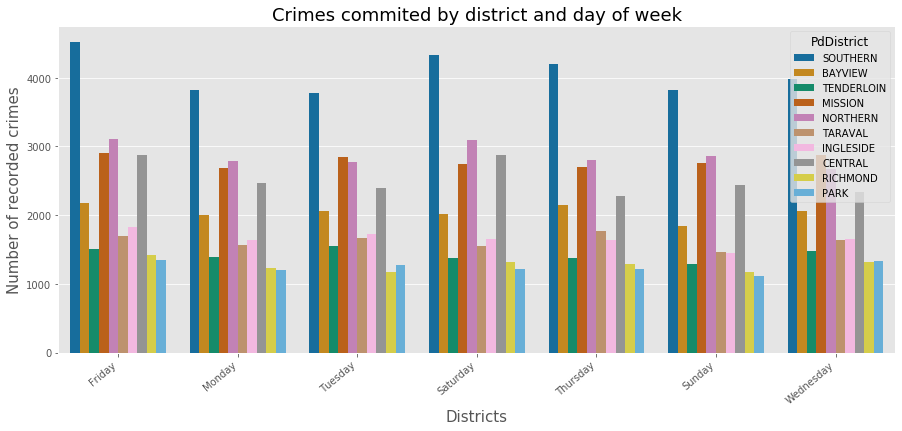

In [12]:
#Show number of crimes per district and day of week
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'DayOfWeek', hue = 'PdDistrict', data = df)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by district and day of week', fontsize=18)

plt.show()

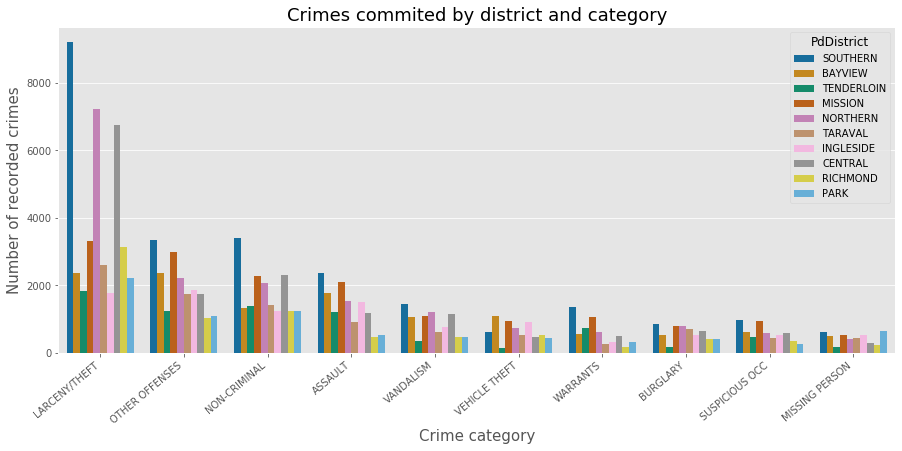

In [13]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'PdDistrict', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Crime category', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by district and category', fontsize=18)

plt.show()

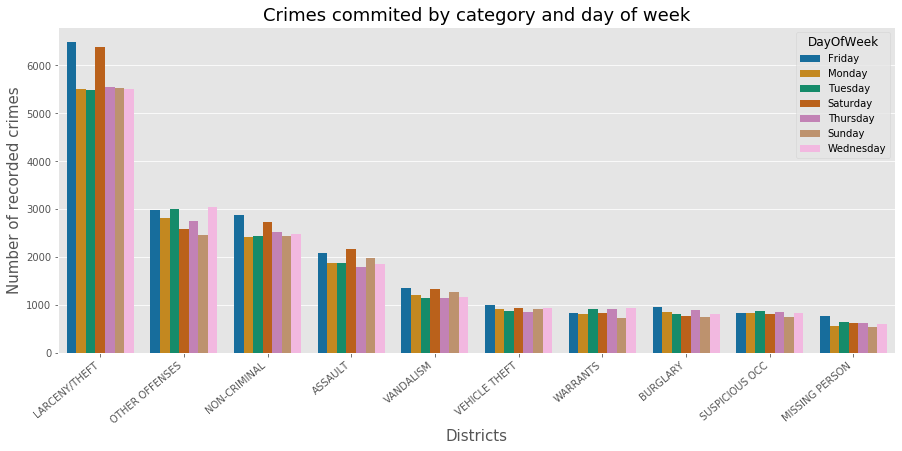

In [14]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'DayOfWeek', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize=18)

plt.show()

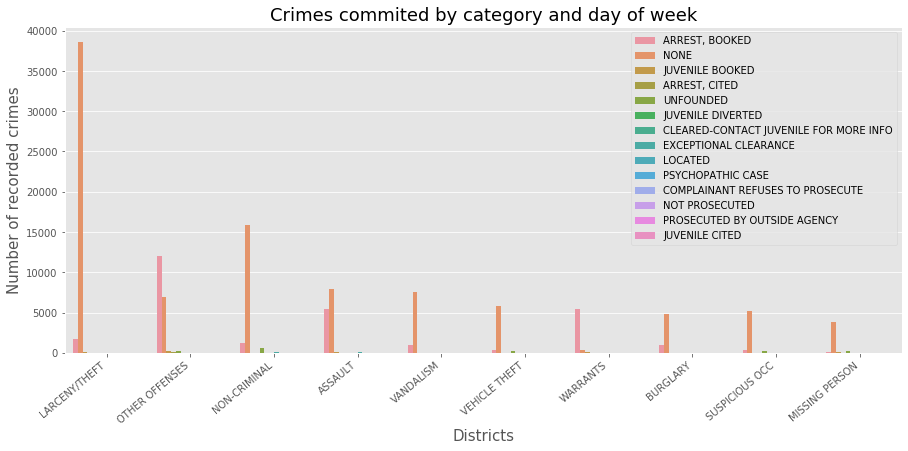

In [15]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
ax = sns.countplot(x = 'Category', hue = 'Resolution', data = df, order = df.Category.value_counts().iloc[:10].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize=18)
plt.legend(loc='upper right')

plt.show()

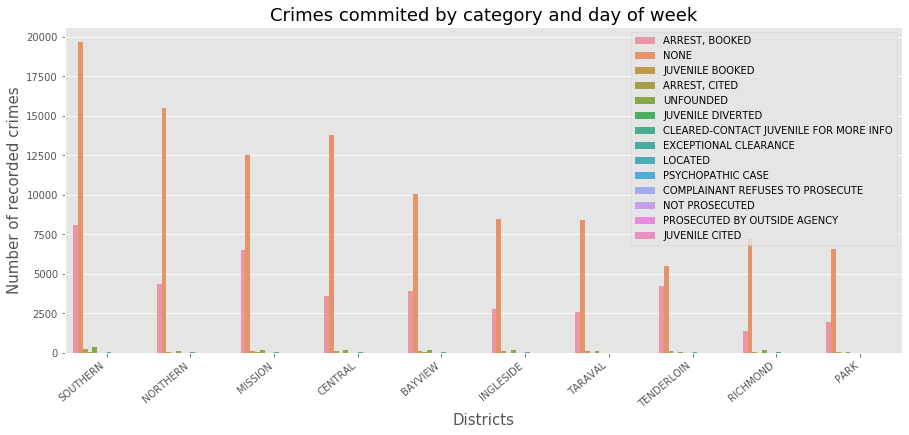

In [16]:
#Show number of crimes per category and district
plt.figure(figsize = (15, 6))
sns.set_palette('colorblind')
ax = sns.countplot(x = 'PdDistrict', hue = 'Resolution', data = df, order = df.PdDistrict.value_counts().iloc[:].index)

#set the axes
ax.set_xlabel('Districts', weight = 'normal', size = 15)
ax.set_ylabel('Number of recorded crimes', weight = 'normal', size = 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Crimes commited by category and day of week', fontsize = 18)
plt.legend(loc='upper right')

plt.show()